In [12]:
import numpy as np
from pylab import *
import matplotlib.pyplot as plt
import scipy.optimize as spo
import pandas as pd
import seaborn as sns

In [42]:
data = pd.read_excel('./donné/titanic3.xls')
data.shape
data.columns
#data.head()

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [18]:
data = data.drop(['name','sibsp','parch','ticket','fare','cabin','embarked', 'boat', 'body', 'home.dest'],axis=1)
data.head()

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000


In [85]:
data = data.dropna(axis=0)
#data.dropna(axis=0,inplace=True)
data.shape

(1046, 4)

In [86]:
data.describe()

,pclass,survived,age
count,1046.000000,1046.000000,1046.000000
mean,2.207457,0.408222,29.881135
std,0.841497,0.491740,14.413500
min,1.000000,0.000000,0.166700
25%,1.000000,0.000000,21.000000
50%,2.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


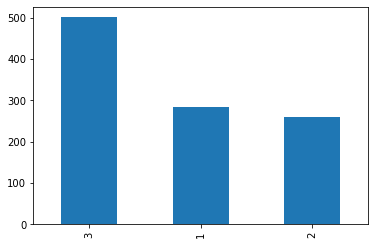

In [87]:
data['pclass'].value_counts().plot.bar()

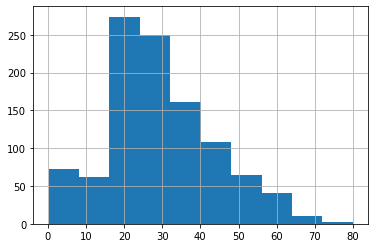

In [88]:
data['age'].hist()

In [89]:
data.groupby(['sex','pclass']).mean()

survived        age
sex    pclass                     
female 1       0.962406  37.037594
       2       0.893204  27.499191
       3       0.473684  22.185307
male   1       0.350993  41.029250
       2       0.145570  30.815401
       3       0.169054  25.962273

In [90]:
data = data.set_index('name')
data['age']

KeyError: "None of ['name'] are in the columns"

In [92]:
data [data['age'] < 18]['pclass'].value_counts()

3    106
2     33
1     15
Name: pclass, dtype: int64

In [93]:
data [data['age'] < 18].groupby(['sex','pclass']).mean()

survived        age
sex    pclass                     
female 1       0.875000  14.125000
       2       1.000000   8.273150
       3       0.543478   8.416667
male   1       0.857143   9.845243
       2       0.733333   6.222220
       3       0.233333   9.838888

In [22]:
data.iloc[0:2,:]

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167


In [35]:
data.loc[0:2,['age','sex']]

,age,sex
0,29.0000,female
1,0.9167,male
2,2.0000,female


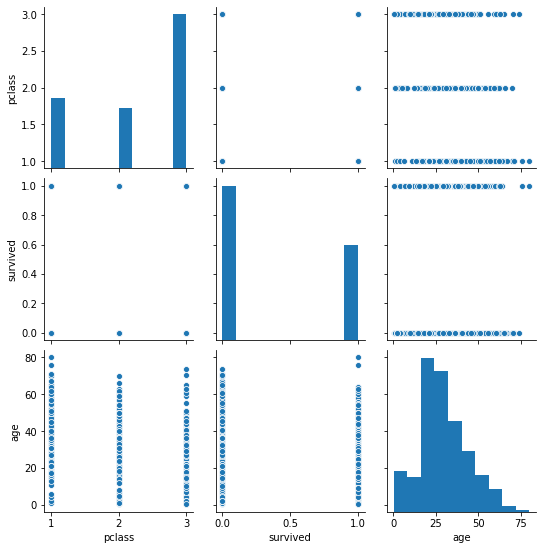

In [37]:
sns.pairplot(data)

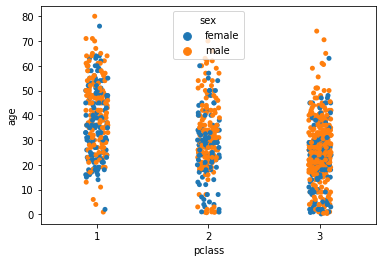

In [51]:
sns.stripplot(x ='pclass',y = 'age',data=data,hue ='sex' )

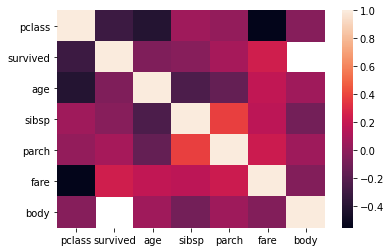

In [53]:
sns.heatmap(data.corr())